In [29]:
import numpy as np
import math
import pandas as pd
from pandas import DataFrame
import os
import matplotlib.pyplot as plt
import netCDF4
import datetime
from datetime import datetime, timedelta
from netCDF4 import num2date, date2num
import xarray as xr
from netCDF4 import Dataset
from numpy.random import uniform
import glob
from scipy.optimize import curve_fit
import os
from pathlib import Path


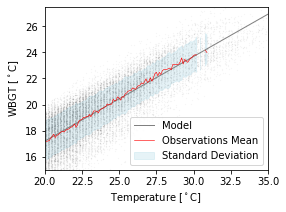

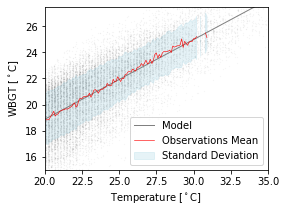

In [30]:
#data from meteosuisse, the wbgt and wbgt in the sun have already been calculated using the R package heat stress

hs = pd.read_csv("../data/stations_heatstress.csv") 
hs = hs.drop(columns='Unnamed: 0')

s='all' #all station   
hs_20 = hs[(hs.temp > 20)] #only keep temperatures above 20 degrees


hs_20 = hs_20.dropna() #get rid of missing values

hs_20_fit = np.polyfit(hs_20.temp, hs_20.wbgt,1) #get a linear fit
hs_20_fit_sun = np.polyfit(hs_20.temp, hs_20.wbgt_sun,1) #get a linear fit


T_to_WBGT = np.poly1d(hs_20_fit) #linear fit
T_to_WBGT_sun = np.poly1d(hs_20_fit_sun)


max_T = np.max(hs_20.temp)
max_T_sun = np.max(hs_20.temp)


min_T = 20

T = np.arange(min_T,max_T,0.1)
sd = np.zeros(len(T))    
mean = np.zeros(len(T))

sd_sun = np.zeros(len(T))    
mean_sun = np.zeros(len(T))



for t in range(len(T)):
    temp = round(T[t],1) #round temperatures to 1 decimal value

    wbgt = hs_20.wbgt[hs_20.temp==temp]
    wbgt_sun = hs_20.wbgt_sun[hs_20.temp==temp]

    if len(wbgt) > 40: #only take the standard deviation when enough points exist for a certain wbgt
        sd[t] = np.std(wbgt)
        mean[t] = np.mean(wbgt)

    else:
        sd[t] = "nan" 
        mean[t] = "nan"


    if len(wbgt_sun)>40:    

        sd_sun[t] = np.std(wbgt_sun)
        mean_sun[t] = np.mean(wbgt_sun)

    else:
        sd_sun[t] = "nan"
        mean_sun[t] = "nan"    

sd_mean=np.nanmean(sd) #mean of the standard deviations ignoring nans
sd_mean_sun=np.nanmean(sd_sun)



fig,ax = plt.subplots(1,1,figsize=(4,3))

ax.scatter (hs_20.temp, hs_20.wbgt, s=0.1,color='k', alpha=0.05,label='_nolegend_')

ax.fill_between(T,T_to_WBGT(T)-sd,T_to_WBGT(T)+sd,color="lightblue",alpha=0.3,label="Standard Deviation")
    
ax.plot (T, T_to_WBGT(T),color="gray", label="Model",linewidth=1)

ax.plot (T, mean,color="red", label="Observations Mean",linewidth=0.6)
ax.legend()
ax.set_xlim([20,35])
ax.set_ylim([15,27.5])
ax.set_xlabel("Temperature [$^\circ$C]")
ax.set_ylabel('WBGT [$^\circ$C]')

plt.savefig('../figures/t_vs_wbgt.pdf',bbox_inches='tight')


fig,ax = plt.subplots(1,1,figsize=(4,3))

ax.scatter (hs_20.temp, hs_20.wbgt_sun, s=0.1,color='k', alpha=0.05,label='_nolegend_')

ax.fill_between(T,T_to_WBGT_sun(T)-sd_sun,T_to_WBGT_sun(T)+sd_sun,color="lightblue",alpha=0.3,label="Standard Deviation")
    
ax.plot (T, T_to_WBGT_sun(T),color="gray", label="Model",linewidth=1)

ax.plot (T, mean_sun,color="red", label="Observations Mean",linewidth=0.6)
ax.legend()
ax.set_xlim([20,35])
ax.set_ylim([15,27.5])
ax.set_xlabel('Temperature [$^\circ$C]')
ax.set_ylabel('WBGT [$^\circ$C]')

plt.savefig('../figures/t_vs_wbgt_sun.pdf',bbox_inches='tight')
  
  

In [33]:
wbgt_ch2018 = pd.read_csv("/Users/szelie/Desktop/wbgt.csv") 

In [34]:
wbgt_ch2018

,time.yy,time.mm,time.dd,time.hh,tre200h0,ure200h0,fkl010h0,fkl010h1,dkl010h0,skycover,...,str.diffus,str.direkt,date,dewp,lat,lon,strinside,wbgt_outside,wbgt_inside,wbgt_bernard
0,2060,1,1,0,9.4,72.0,5.2,11.1,237,86,...,0,0,2060-01-01 00:00:00,3.80,47.4,8.55,0,7.180569,7.180569,7.575450
1,2060,1,1,1,9.2,74.4,4.6,10.0,236,87,...,0,0,2060-01-01 01:00:00,4.08,47.4,8.55,0,7.121731,7.121731,7.524082
2,2060,1,1,2,9.1,75.7,4.2,9.0,237,87,...,0,0,2060-01-01 02:00:00,4.24,47.4,8.55,0,7.094452,7.094452,7.504774
3,2060,1,1,3,9.1,76.7,3.9,8.6,239,87,...,0,0,2060-01-01 03:00:00,4.44,47.4,8.55,0,7.146859,7.146859,7.563660
4,2060,1,1,4,9.1,76.6,3.8,8.7,241,87,...,0,0,2060-01-01 04:00:00,4.42,47.4,8.55,0,7.136515,7.136515,7.557758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2060,12,31,19,10.0,63.3,7.6,18.6,242,78,...,0,0,2060-12-31 19:00:00,2.66,47.4,8.55,0,7.274839,7.274839,7.656899
8756,2060,12,31,20,9.9,63.8,7.3,17.0,242,80,...,0,0,2060-12-31 20:00:00,2.66,47.4,8.55,0,7.205775,7.205775,7.590693
8757,2060,12,31,21,9.8,65.0,6.9,15.9,242,81,...,0,0,2060-12-31 21:00:00,2.80,47.4,8.55,0,7.175147,7.175147,7.562105
8758,2060,12,31,22,9.7,66.6,6.4,14.2,241,83,...,0,0,2060-12-31 22:00:00,3.02,47.4,8.55,0,7.165865,7.165865,7.555710


In [36]:
wbgt_ch2018 = wbgt_ch2018[wbgt_ch2018['tre200h0']>20]

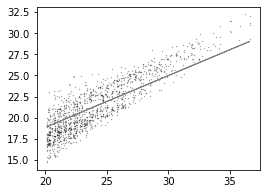

In [31]:
fig,ax = plt.subplots(1,1,figsize=(4,3))

ax.scatter (wbgt_ch2018.tre200h0, wbgt_ch2018.wbgt_outside, s=0.1,color='k', alpha=0.5,label='_nolegend_')

#ax.fill_between(wbgt_ch2018.tre200h0,T_to_WBGT(wbgt_ch2018.tre200h0)-sd,T_to_WBGT(wbgt_ch2018.tre200h0)+sd,color="lightblue",alpha=0.3,label="Standard Deviation")
    
ax.plot(wbgt_ch2018.tre200h0, T_to_WBGT_sun(wbgt_ch2018.tre200h0),color="gray", label="Model",linewidth=1)

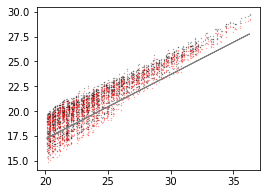

In [40]:
fig,ax = plt.subplots(1,1,figsize=(4,3))

ax.scatter(wbgt_ch2018.tre200h0, wbgt_ch2018.wbgt_bernard, s=0.1,color='k', alpha=0.5,label='_nolegend_')

ax.scatter(wbgt_ch2018.tre200h0, wbgt_ch2018.wbgt_inside, s=0.1,color='Red', alpha=0.5,label='_nolegend_')


#ax.fill_between(wbgt_ch2018.tre200h0,T_to_WBGT(wbgt_ch2018.tre200h0)-sd,T_to_WBGT(wbgt_ch2018.tre200h0)+sd,color="lightblue",alpha=0.3,label="Standard Deviation")
    
ax.plot(wbgt_ch2018.tre200h0, T_to_WBGT(wbgt_ch2018.tre200h0),color="gray", label="Model",linewidth=1)

In [19]:
from sklearn.metrics import mean_squared_error


np.std(wbgt_ch2018.tre200h0 - T_to_WBGT_sun(wbgt_ch2018.tre200h0))

1.320159012761028

In [63]:
hs = hs.dropna()

In [64]:
time = hs['time'].astype(int).astype(str)

In [65]:
time

0         2015010100
1         2015010101
2         2015010102
3         2015010103
4         2015010104
             ...    
170534    2018061506
170535    2018061507
170536    2018061508
170537    2018061509
170538    2018061510
Name: time, Length: 150974, dtype: object

In [87]:
date = [" ".join(["-".join([t[0:4], t[4:6], t[6:8]]), ":".join([t[8:10], '00', '00'])]) for t in time]


In [96]:
hs['time'] = date

In [100]:
hs = pd.read_csv('../data/station_heatstress2.csv')

In [102]:
hs

,Unnamed: 0,X,station,time,radiation,temp,dwp,wind,wbgt,wbgt_sun,radiation.shadow,wbgt_shadow
0,1,0,BAS,2015-01-01 00:00:00,241.0,-5.1,-5.8,1.5,-5.251393,-3.832171,0,-6.007891
1,2,1,BAS,2015-01-01 01:00:00,223.0,-5.7,-6.6,1.0,-5.888265,-4.356797,0,-6.813682
2,3,2,BAS,2015-01-01 02:00:00,221.0,-6.1,-7.1,0.8,-6.304738,-4.669031,0,-7.306647
3,4,3,BAS,2015-01-01 03:00:00,222.0,-5.5,-6.6,0.7,-5.730835,-4.026900,0,-6.767622
4,5,4,BAS,2015-01-01 04:00:00,224.0,-6.1,-7.1,0.5,-6.304738,-4.518832,0,-7.481115
...,...,...,...,...,...,...,...,...,...,...,...,...
150969,150970,170534,SMA,2018-06-15 06:00:00,314.0,12.9,9.7,1.9,11.694682,13.098610,0,11.246190
150970,150971,170535,SMA,2018-06-15 07:00:00,319.0,14.0,9.9,2.0,12.440693,13.811413,0,11.990532
150971,150972,170536,SMA,2018-06-15 08:00:00,321.0,15.6,10.4,1.5,13.587510,15.143244,0,13.084909
150972,150973,170537,SMA,2018-06-15 09:00:00,323.0,17.0,10.5,1.6,14.462648,15.943820,0,13.953376


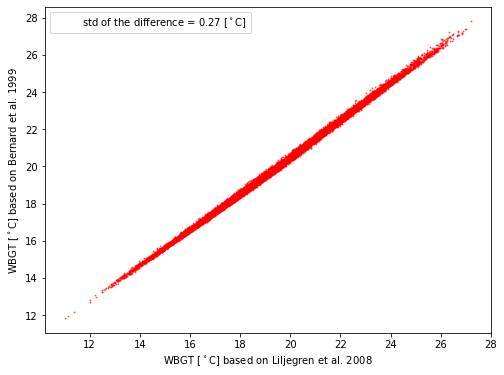

In [120]:
hs = hs[hs['temp']>20]
fig,ax = plt.subplots(1,1,figsize=(8,6))

ax.scatter(hs.wbgt_shadow, hs.wbgt, s=1,color='Red', alpha=0.5)
ax.scatter(20,20, alpha=0, label='std of the difference = 0.27 [$^\circ$C]')

ax.set_xlabel("WBGT [$^\circ$C] based on Liljegren et al. 2008")
ax.set_ylabel("WBGT [$^\circ$C] based on Bernard et al. 1999")
ax.legend()


#ax.scatter(hs.temp, hs.wbgt_shadow, s=1,color='Red', alpha=0.5,label='_nolegend_')


#ax.fill_between(wbgt_ch2018.tre200h0,T_to_WBGT(wbgt_ch2018.tre200h0)-sd,T_to_WBGT(wbgt_ch2018.tre200h0)+sd,color="lightblue",alpha=0.3,label="Standard Deviation")
    


In [109]:
mean_squared_error(hs.wbgt_shadow, hs.wbgt)

0.2720049058776918